<a href="https://colab.research.google.com/github/marilikalantzi/datajour/blob/main/Nb2_final_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy

In [161]:
df = pd.read_csv("/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report.csv")
df.head()

,source,categories,datetime,full_text
0,tinealarissa.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:52,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο..."
1,in.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:40,Ευρωεκλογές 2024: Τι λένε οι διακηρύξεις των ε...
2,tanea.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:35,Μητσοτάκης με Μαρέβα και Κασσελάκης με Τάιλερ ...
3,newsbomb.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:00,Μίλτος Τεντόγλου: Τα θερμά συγχαρητήρια των αρ...
4,cnn.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:00,Ευρωεκλογές 2024: Το manual της ευρωκάλπης - Μ...


In [162]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [163]:
df["full_text"]

0       Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο...
1       Ευρωεκλογές 2024: Τι λένε οι διακηρύξεις των ε...
2       Μητσοτάκης με Μαρέβα και Κασσελάκης με Τάιλερ ...
3       Μίλτος Τεντόγλου: Τα θερμά συγχαρητήρια των αρ...
4       Ευρωεκλογές 2024: Το manual της ευρωκάλπης - Μ...
                              ...                        
4873    Δελτίο ειδήσεων στις 21:00 Μαίνεται η μεγάλη φ...
4874    Απόλυτη κυριαρχία της ΝΔ στις τέσσερις τελευτα...
4875    Στέφανος Κασσελάκης - Πάτρα\n/\nΟ ΣΥΡΙΖΑ θα έρ...
4876    Ν. Ανδρουλάκης: Ψήφος στο ΠΑΣΟΚ είναι μήνυμα α...
4877    Δημοσκόπηση Pulse: Διατηρεί τη μεγάλη διαφορά ...
Name: full_text, Length: 4878, dtype: object

In [164]:
full_text = df['full_text'].str.cat(sep = ' ')

In [165]:
print(full_text)

In [166]:
import spacy

In [167]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 16.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [168]:
nlp = spacy.load('el_core_news_sm')

In [169]:
list(nlp.Defaults.stop_words)[0:20]

['κάποιαν',
 'γι',
 'μετ',
 'κάποιων',
 'πίσω',
 'όλην',
 'υπόψη',
 'καθενός',
 'ιδίως',
 'μέλλεται',
 'συχνόν',
 'άλλες',
 'όσο',
 'ήμαστε',
 'ωστόσο',
 'ορισμένα',
 'αν',
 'πέρυσι',
 'σαν',
 'απέναντι']

In [170]:
custom_stopwords = ['ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']

In [171]:
nlp.Defaults.stop_words |= {"ευρωεκλογές","ευρωβουλή","ελλάδα","χώρα"}

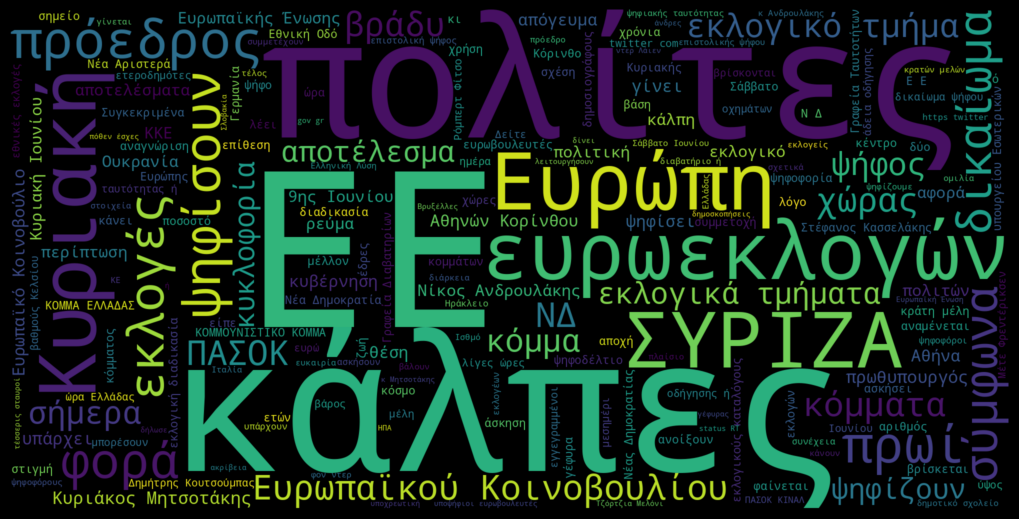

In [174]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [175]:
doc = nlp(df['full_text'][1])

In [176]:
for token in doc:
    print(token, token.lemma_)

Ευρωεκλογές ευρωεκλογές
2024 2024
: :
Τι τι
λένε λένε
οι ο
διακηρύξεις διακηρύξεις
των ο
ευρωομάδων ευρωομάδων
για για
την ο
ενέργεια ενέργεια
και και
την ο
κλιματική κλιματικός
αλλαγή αλλαγή
Η ο
ισορροπία ισορροπία
δυνάμεων δύναμη
στο σε ο
νέο νέος
κοινοβούλιο κοινοβούλιο
που που
θα θα
προκύψει προκύπτω
από από
τις ο
ευρωεκλογές ευρωεκλογή
θα θα
διαδραματίσει διαδραματίζω
καθοριστικό καθοριστικός
ρόλο ρόλος
και και
στο σε ο
αν αν
θα θα
ψηφιστούν ψηφιστούν
ή ή
όχι όχι
οι ο
φιλόδοξες φιλόδοξες
νέες νέος
πολιτικές πολιτική
για για
την ο
ενέργεια ενέργεια
και και
το ο
κλίμα κλίμα

 

Επιμέλεια επιμέλεια

 

Νατάσα Νατάσα
Ρουγγέρη Ρουγγέρη

 

Οι ο
ευρωεκλογές ευρωεκλογή
έρχονται έρχομαι
σε σε
μια ένας
κρίσιμη κρίσιμος
στιγμή στιγμή
για για
την ο
πολιτική πολιτική
για για
το ο
κλίμα κλίμα
και και
την ο

 

ενέργεια ενέργεια

 

σε σε
ολόκληρη ολόκληρος
την ο

 

Ευρώπη Ευρώπη

 

. .

 

Εν εν
μέσω μέσω
γεωπολιτικής γεωπολιτικός
αναταραχής αναταραχή
, ,
τα ο
κράτη κράτος
μέλη μέλος
της ο
Ε

In [177]:
df['full_text'][1]

'Ευρωεκλογές 2024: Τι λένε οι διακηρύξεις των ευρωομάδων για την ενέργεια και την κλιματική αλλαγή Η ισορροπία δυνάμεων στο νέο κοινοβούλιο που θα προκύψει από τις ευρωεκλογές θα διαδραματίσει καθοριστικό ρόλο και στο αν θα ψηφιστούν ή όχι οι φιλόδοξες νέες πολιτικές για την ενέργεια και το κλίμα\nΕπιμέλεια\nΝατάσα Ρουγγέρη\nΟι ευρωεκλογές έρχονται σε μια κρίσιμη στιγμή για την πολιτική για το κλίμα και την\nενέργεια\nσε ολόκληρη την\nΕυρώπη\n.\nΕν μέσω γεωπολιτικής αναταραχής, τα κράτη μέλη της ΕΕ αντιμετωπίζουν αυξανόμενη πίεση για την παροχή ασφαλούς ενεργειακού εφοδιασμού και τον ανταγωνισμό με άλλες μεγάλες δυνάμεις, όπως η Κίνα και οι ΗΠΑ.\nΕν τω μεταξύ, υπάρχουν εκτεταμένες αναφορές για μια «πράσινη αντίδραση» σε πολλές χώρες της ΕΕ, με κυρίαρχο παράδειγμα τις πρόσφατες διαμαρτυρίες των αγροτών σε όλη την Ευρώπη, οι οποίοι θεωρούν άδικες τις περιβαλλοντικές πολιτικές και ειδικά την Κοινή Αγροτική Πολιτική (ΚΑΠ).\nΜε τις ευρωεκλογές του 2024 σε εξέλιξη, οι αναλυτές προβλέπουν μια

In [178]:
' '.join(token.lemma_ for token in doc)

'ευρωεκλογές 2024 : τι λένε ο διακηρύξεις ο ευρωομάδων για ο ενέργεια και ο κλιματικός αλλαγή ο ισορροπία δύναμη σε ο νέος κοινοβούλιο που θα προκύπτω από ο ευρωεκλογή θα διαδραματίζω καθοριστικός ρόλος και σε ο αν θα ψηφιστούν ή όχι ο φιλόδοξες νέος πολιτική για ο ενέργεια και ο κλίμα \n επιμέλεια \n Νατάσα Ρουγγέρη \n ο ευρωεκλογή έρχομαι σε ένας κρίσιμος στιγμή για ο πολιτική για ο κλίμα και ο \n ενέργεια \n σε ολόκληρος ο \n Ευρώπη \n . \n εν μέσω γεωπολιτικός αναταραχή , ο κράτος μέλος ο ΕΕ αντιμετωπίζω αυξανόμενος πίεση για ο παροχή ασφαλός ενεργειακός εφοδιασμός και ο ανταγωνισμός με άλλος μεγάλος δύναμη , όπως ο Κίνα και ο ΗΠΑ . \n εν τω μεταξύ , υπάρχω εκτεταμένος αναφορά για ένας « πράσινη αντίδραση » σε πολύς χώρα ο ΕΕ , με κυρίαρχος παράδειγμα ο πρόσφατος διαμαρτυρία ο αγροτός σε όλος ο Ευρώπη , ο οποίος θεωρώ άδικα ο περιβαλλοντικός πολιτική και ειδικά ο κοινός Αγροτική Πολιτική ( ΚΑΠ ) . \n με ο ευρωεκλογή ο 2024 σε εξέλιξη , ο αναλυτής προβλέπω ένας δεξιότερη στροφή σε ο

In [ ]:
full_text